In [1]:
from qiskit.aqua.algorithms import NumPyMinimumEigensolver
from qiskit.optimization.algorithms import GroverOptimizer, MinimumEigenOptimizer, GroverOptimizationResult
from qiskit.optimization.problems import QuadraticProgram
from docplex.mp.model import Model
from qiskit.circuit.library import QuadraticForm
from qiskit.aqua.algorithms.amplitude_amplifiers.grover import Grover
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit import IBMQ, BasicAer ,Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.optimization.converters.quadratic_program_to_qubo import (QuadraticProgramToQubo,
                                                    QuadraticProgramConverter)
from qiskit.optimization.algorithms import (OptimizationResultStatus, OptimizationAlgorithm,
                                     OptimizationResult)
import math as math
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Union, List
from copy import deepcopy
from qiskit.circuit import ParameterVector, Parameter
from collections import defaultdict
from scipy.optimize import minimize
from qiskit.quantum_info.states import partial_trace
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import SparsePauliOp

### Block-encoded swap test

We show here an example case where the two states whose overlap we are interested in are 
$\lvert \phi \rangle = H^{\otimes 2}\lvert 00 \rangle$ and $\lvert \psi \rangle = \lvert 00 \rangle$.

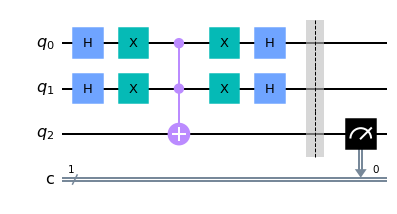

In [29]:
qc = QuantumCircuit(3, 1)

qc.h(0)
qc.h(1)

qc.x(0)
qc.x(1)
qc.mcx([0, 1], 2, mode='noancilla')
qc.x(0)
qc.x(1)

qc.h(0)
qc.h(1)

qc.barrier()

qc.measure([2], [0])

qc.draw('mpl')

In [37]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, nshots=5000).result().get_counts(qc)

counts

{'0': 762, '1': 262}

In [38]:
counts['1']/(counts['0'] + counts['1'])

0.255859375

The correct answer is 1/4